In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from plotly.subplots import make_subplots

In [ ]:
#import fredapi key
from fredapi import Fred

from dotenv import load_dotenv
import os

#Load variables from .env
load_dotenv() 
fred_key = os.getenv("FRED_API_KEY")

#create fred object
fred = Fred(api_key=fred_key)

How has employment in specific industries evolved over the last decade? (scatter plots between job postings and median salary for sector specific jobs. Check The U.S. Bureau of Labor Statistics (BLS)' Job Openings and Labor Turnover Survey (JOLTS) for postings).

*What are the trends in job vacancies, hires, and quits, especially in high-demand sectors?

Use job openings/layoff data from 2019-2024


-Do you want to plot job openings and layoff together? Or do you want to analyse this sector?

In [ ]:
fred.search('Job Openings').head()
# job openings total nonfarm

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
JTSJOL,JTSJOL,2024-11-15,2024-11-15,Job Openings: Total Nonfarm,2000-12-01,2024-09-01,Monthly,M,Level in Thousands,Level in Thous.,Seasonally Adjusted,SA,2024-10-29 09:06:01-05:00,77,Total Nonfarm Job Openings are a measure of al...
JTSJOR,JTSJOR,2024-11-15,2024-11-15,Job Openings: Total Nonfarm,2000-12-01,2024-09-01,Monthly,M,Rate,Rate,Seasonally Adjusted,SA,2024-10-29 09:06:03-05:00,50,None
JTUJOL,JTUJOL,2024-11-15,2024-11-15,Job Openings: Total Nonfarm,2000-12-01,2024-09-01,Monthly,M,Level in Thousands,Level in Thous.,Not Seasonally Adjusted,NSA,2024-10-29 09:05:08-05:00,28,None
JTUJOR,JTUJOR,2024-11-15,2024-11-15,Job Openings: Total Nonfarm,2000-12-01,2024-09-01,Monthly,M,Rate,Rate,Not Seasonally Adjusted,NSA,2024-10-29 09:05:14-05:00,13,None
JTSLDL,JTSLDL,2024-11-15,2024-11-15,Layoffs and Discharges: Total Nonfarm,2000-12-01,2024-09-01,Monthly,M,Level in Thousands,Level in Thous.,Seasonally Adjusted,SA,2024-10-29 09:06:01-05:00,65,None


In [12]:
fred.search('Layoffs').head()
# layoffs total nonfarm

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
JTSLDL,JTSLDL,2024-11-15,2024-11-15,Layoffs and Discharges: Total Nonfarm,2000-12-01,2024-09-01,Monthly,M,Level in Thousands,Level in Thous.,Seasonally Adjusted,SA,2024-10-29 09:06:01-05:00,65,None
JTSLDR,JTSLDR,2024-11-15,2024-11-15,Layoffs and Discharges: Total Nonfarm,2000-12-01,2024-09-01,Monthly,M,Rate,Rate,Seasonally Adjusted,SA,2024-10-29 09:06:03-05:00,40,None
JTULDL,JTULDL,2024-11-15,2024-11-15,Layoffs and Discharges: Total Nonfarm,2000-12-01,2024-09-01,Monthly,M,Level in Thousands,Level in Thous.,Not Seasonally Adjusted,NSA,2024-10-29 09:05:11-05:00,15,None
JTULDR,JTULDR,2024-11-15,2024-11-15,Layoffs and Discharges: Total Nonfarm,2000-12-01,2024-09-01,Monthly,M,Rate,Rate,Not Seasonally Adjusted,NSA,2024-10-29 09:05:16-05:00,9,None
JTS1000LDL,JTS1000LDL,2024-11-15,2024-11-15,Layoffs and Discharges: Total Private,2000-12-01,2024-09-01,Monthly,M,Level in Thousands,Level in Thous.,Seasonally Adjusted,SA,2024-10-29 09:05:06-05:00,30,None


In [10]:
job_openings = fred.get_series('JTSJOL', observation_start='2019-01-01', observation_end='2024-10-01').to_frame(name='Job Openings')
job_openings

,Job Openings
2019-01-01,7502.0
2019-02-01,7066.0
2019-03-01,7317.0
2019-04-01,7272.0
2019-05-01,7275.0
...,...
2024-05-01,8230.0
2024-06-01,7910.0
2024-07-01,7711.0
2024-08-01,7861.0


In [13]:
layoffs = fred.get_series('JTSLDL', observation_start='2019-01-01', observation_end='2024-10-01').to_frame(name='Layoffs & Discharges')
layoffs

,Layoffs & Discharges
2019-01-01,1705.0
2019-02-01,1763.0
2019-03-01,1690.0
2019-04-01,1963.0
2019-05-01,1775.0
...,...
2024-05-01,1678.0
2024-06-01,1560.0
2024-07-01,1713.0
2024-08-01,1668.0


In [14]:
merged_df = pd.concat([job_openings, layoffs], axis=1, join='inner')
merged_df

,Job Openings,Layoffs & Discharges
2019-01-01,7502.0,1705.0
2019-02-01,7066.0,1763.0
2019-03-01,7317.0,1690.0
2019-04-01,7272.0,1963.0
2019-05-01,7275.0,1775.0
...,...,...
2024-05-01,8230.0,1678.0
2024-06-01,7910.0,1560.0
2024-07-01,7711.0,1713.0
2024-08-01,7861.0,1668.0


In [31]:
# merged_df.plot(figsize=(10, 6.5), kind='line')

fig = px.line(merged_df)

fig.update_layout(
    title='Number of Job Openings vs Layoffs',
    xaxis_title='',
    yaxis_title='Level in Thousands',
    width = 900, height=500,
    legend_title_text = '',
    yaxis=dict(
        tickformat=","
    )
)

![Job Openings vs Layoffs](Images/job_openings_layoff.png)

### Job Openings Trend

The idea here is that the number of job openings should align with nfp data for a given sector. Would be interesting to see of there are any mismatches (high job openings, low employment number and vice versa).

Note: I excluded 'Information' and 'Financial Activities' Sectors as this did not contain seasonally adjiusted data

In [45]:
#Filtering for relevant data
sector_job_openings = fred.search('Job Openings')
sector_job_openings = sector_job_openings[sector_job_openings['seasonal_adjustment'] == 'Seasonally Adjusted']
sector_job_openings = sector_job_openings[sector_job_openings['title'].str.contains('Job Openings')]
sector_job_openings = sector_job_openings[sector_job_openings['units'] == 'Level in Thousands']
sector_job_openings = sector_job_openings.iloc[[1, 3, 4, 6, 10, 13]]

sector_job_openings

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
JTS2300JOL,JTS2300JOL,2024-11-16,2024-11-16,Job Openings: Construction,2000-12-01,2024-09-01,Monthly,M,Level in Thousands,Level in Thous.,Seasonally Adjusted,SA,2024-10-29 09:05:02-05:00,46,None
JTS3000JOL,JTS3000JOL,2024-11-16,2024-11-16,Job Openings: Manufacturing,2000-12-01,2024-09-01,Monthly,M,Level in Thousands,Level in Thous.,Seasonally Adjusted,SA,2024-10-29 09:05:04-05:00,40,None
JTS540099JOL,JTS540099JOL,2024-11-16,2024-11-16,Job Openings: Professional and Business Services,2000-12-01,2024-09-01,Monthly,M,Level in Thousands,Level in Thous.,Seasonally Adjusted,SA,2024-10-29 09:05:05-05:00,36,None
JTS7000JOL,JTS7000JOL,2024-11-16,2024-11-16,Job Openings: Leisure and Hospitality,2000-12-01,2024-09-01,Monthly,M,Level in Thousands,Level in Thous.,Seasonally Adjusted,SA,2024-10-29 09:05:06-05:00,29,None
JTS6000JOL,JTS6000JOL,2024-11-16,2024-11-16,Job Openings: Private Education and Health Ser...,2000-12-01,2024-09-01,Monthly,M,Level in Thousands,Level in Thous.,Seasonally Adjusted,SA,2024-10-29 09:05:14-05:00,16,None
JTS4000JOL,JTS4000JOL,2024-11-16,2024-11-16,"Job Openings: Trade, Transportation, and Utili...",2000-12-01,2024-09-01,Monthly,M,Level in Thousands,Level in Thous.,Seasonally Adjusted,SA,2024-10-29 09:05:27-05:00,7,None


In [46]:
#Creating a new list that contains all the data accessible by index

all_results = []

for id in sector_job_openings.index:
    results = fred.get_series(id, observation_start='2019-01-01', observation_end='2024-10-01')
    results = results.to_frame(name=id)
    all_results.append(results)

In [47]:
all_results[0]

,JTS2300JOL
2019-01-01,309.0
2019-02-01,287.0
2019-03-01,359.0
2019-04-01,405.0
2019-05-01,357.0
...,...
2024-05-01,366.0
2024-06-01,299.0
2024-07-01,232.0
2024-08-01,328.0


In [48]:
#Concatenating all dataframes in the list into a single dataframe
sector_jo_df = pd.concat(all_results, axis=1, join='inner').dropna()
sector_jo_df

,JTS2300JOL,JTS3000JOL,JTS540099JOL,JTS7000JOL,JTS6000JOL,JTS4000JOL
2019-01-01,309.0,431.0,1391.0,1121.0,1360.0,1446.0
2019-02-01,287.0,457.0,1387.0,998.0,1215.0,1273.0
2019-03-01,359.0,435.0,1347.0,1005.0,1350.0,1311.0
2019-04-01,405.0,451.0,1169.0,1024.0,1399.0,1350.0
2019-05-01,357.0,471.0,1277.0,1018.0,1363.0,1312.0
...,...,...,...,...,...,...
2024-05-01,366.0,586.0,1512.0,900.0,1873.0,1047.0
2024-06-01,299.0,474.0,1339.0,943.0,1791.0,1185.0
2024-07-01,232.0,505.0,1553.0,965.0,1624.0,1038.0
2024-08-01,328.0,491.0,1454.0,1059.0,1636.0,1131.0


In [ ]:
#Pairs each index ID with its corresponding title and removes 'job openings' from title
label_names = {
    index: title.replace('Job Openings:', '').strip()
    for index, title in zip(sector_job_openings.index, sector_job_openings['title'])}
label_names

{'JTS2300JOL': 'Construction',
 'JTS3000JOL': 'Manufacturing',
 'JTS540099JOL': 'Professional and Business Services',
 'JTS7000JOL': 'Leisure and Hospitality',
 'JTS6000JOL': 'Private Education and Health Services',
 'JTS4000JOL': 'Trade, Transportation, and Utilities'}

In [50]:
#Replacing series ID with corresponding title
for i, (id, title) in enumerate(label_names.items()):
    sector_jo_df = sector_jo_df.rename(columns={id:title})

sector_jo_df

,Construction,Manufacturing,Professional and Business Services,Leisure and Hospitality,Private Education and Health Services,"Trade, Transportation, and Utilities"
2019-01-01,309.0,431.0,1391.0,1121.0,1360.0,1446.0
2019-02-01,287.0,457.0,1387.0,998.0,1215.0,1273.0
2019-03-01,359.0,435.0,1347.0,1005.0,1350.0,1311.0
2019-04-01,405.0,451.0,1169.0,1024.0,1399.0,1350.0
2019-05-01,357.0,471.0,1277.0,1018.0,1363.0,1312.0
...,...,...,...,...,...,...
2024-05-01,366.0,586.0,1512.0,900.0,1873.0,1047.0
2024-06-01,299.0,474.0,1339.0,943.0,1791.0,1185.0
2024-07-01,232.0,505.0,1553.0,965.0,1624.0,1038.0
2024-08-01,328.0,491.0,1454.0,1059.0,1636.0,1131.0


In [ ]:
#Remove 'Job Openings:' from the column titles
# sector_jo_df.columns = sector_jo_df.columns.str.replace('Job Openings:', '', regex=False).str.strip()
# sector_jo_df

,Construction,Manufacturing,Professional and Business Services,Leisure and Hospitality,Private Education and Health Services,"Trade, Transportation, and Utilities"
2019-01-01,309.0,431.0,1391.0,1121.0,1360.0,1446.0
2019-02-01,287.0,457.0,1387.0,998.0,1215.0,1273.0
2019-03-01,359.0,435.0,1347.0,1005.0,1350.0,1311.0
2019-04-01,405.0,451.0,1169.0,1024.0,1399.0,1350.0
2019-05-01,357.0,471.0,1277.0,1018.0,1363.0,1312.0
...,...,...,...,...,...,...
2024-05-01,366.0,586.0,1512.0,900.0,1873.0,1047.0
2024-06-01,299.0,474.0,1339.0,943.0,1791.0,1185.0
2024-07-01,232.0,505.0,1553.0,965.0,1624.0,1038.0
2024-08-01,328.0,491.0,1454.0,1059.0,1636.0,1131.0


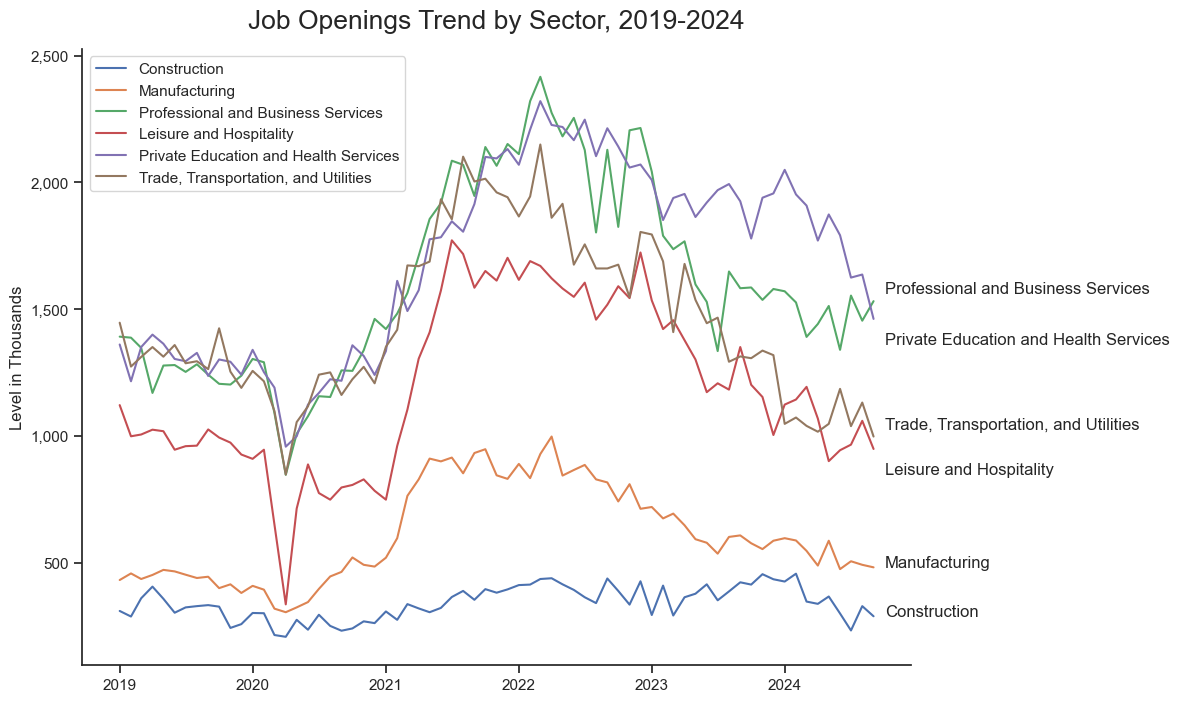

In [88]:
plt.figure(figsize=(10.7, 8))
sns.lineplot(data=sector_jo_df, dashes=False)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Job Openings Trend by Sector, 2019-2024', fontsize=19, y=1.02)
plt.ylabel('Level in Thousands')

ax= plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y):,}'))


for i, (id, title) in enumerate(label_names.items()):
    offset=0  
    y_val = sector_jo_df.iloc[-1, i]
    x_val = sector_jo_df.index[-1] 
    x_pos= x_val + pd.Timedelta(days=32)  

    if i == 3 or i == 4: 
        offset = 100
        y_val = sector_jo_df.iloc[-1, i] - offset
    elif i == 2 or i == 5:
        offset =30
        y_val = sector_jo_df.iloc[-1, i] + offset

    plt.text(x_pos, y_val, label_names[id], fontsize=12)

In [53]:
for i, (label, items) in enumerate(label_names.items()):
    print(i, label, items)

0 JTS2300JOL Construction
1 JTS3000JOL Manufacturing
2 JTS540099JOL Professional and Business Services
3 JTS7000JOL Leisure and Hospitality
4 JTS6000JOL Private Education and Health Services
5 JTS4000JOL Trade, Transportation, and Utilities
